In [1]:
import numpy as np
from scipy.spatial.distance import cosine
from fastdtw import fastdtw
from sentence_transformers import SentenceTransformer

/home/tiago/anaconda3/envs/aulas/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

/home/tiago/anaconda3/envs/aulas/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
def read_senteces(filename : str) -> list:
    import re

    with open(filename, 'r') as file:
        text = file.read()
    sentences = re.split(r'[.:!?\n]+', text)
    return sentences

sentences_students = read_senteces('text_students.txt')
sentences_blog = read_senteces('text_blog.txt')


In [4]:
print(sentences_blog)

['Entendimento do negócio', ' A primeira etapa é, possivelmente, a mais importante de todo o processo', ' Caso ela não seja feita da maneira correta, todo o resto do projeto pode ser invalidado futuramente', ' Nesta etapa, é definido o objetivo do projeto e as necessidades da empresa ou projeto em análise', ' Por isso, é necessário que todos estejam bem-informados e completamente alinhados', 'Entendimento dos dados', ' Depois da primeira etapa, podemos começar a pensar nos dados que serão utilizados no processo', ' Para isso podemos fazer várias perguntas, como', ' “A empresa tem banco de dados', ' Os dados serão acessados de que forma', ' Quantas fontes de dados serão utilizadas', ' Quais serão os formatos dos dados', ' Os dados estão estruturados', '”', ' A partir delas, é feita a coleta dos dados, tomando cuidado para que nenhuma informação importante fique de fora', 'Preparação dos dados', ' Com os dados já coletados, é preciso organizá-los de modo a conseguirmos enxergar o que ele

In [5]:
embeddings_students = model.encode(sentences_students)
embeddings_blog = model.encode(sentences_blog)

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_similarities = cosine_similarity(embeddings_students, embeddings_blog)

print(embeddings_students.shape, embeddings_blog.shape, cosine_similarities.shape)

(25, 768) (46, 768) (25, 46)


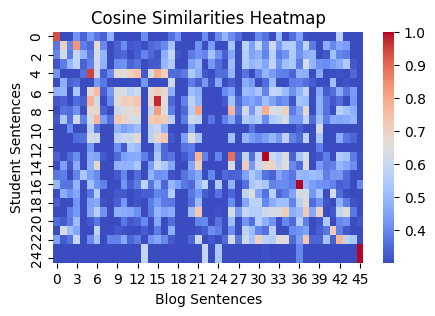

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the cosine similarities as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cosine_similarities.clip(0.3,1), annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Cosine Similarities Heatmap')
plt.xlabel('Blog Sentences')
plt.ylabel('Student Sentences')
plt.show()

In [8]:
# Compute Dynamic Time Warping distance
distance, path = fastdtw(embeddings_students, embeddings_blog, dist=cosine)

print(f"DTW distance: {distance}")
print(f"DTW path: {path}")

DTW distance: 19.061785458195875
DTW path: [(0, 0), (1, 1), (1, 2), (1, 3), (2, 4), (2, 5), (2, 6), (3, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (5, 13), (6, 14), (7, 15), (8, 16), (9, 17), (10, 18), (11, 19), (11, 20), (11, 21), (12, 22), (13, 23), (13, 24), (13, 25), (13, 26), (13, 27), (13, 28), (13, 29), (13, 30), (13, 31), (14, 32), (14, 33), (14, 34), (15, 35), (16, 36), (17, 37), (18, 38), (19, 39), (20, 40), (21, 41), (22, 42), (22, 43), (22, 44), (23, 45), (24, 45)]


0.4055699033658697


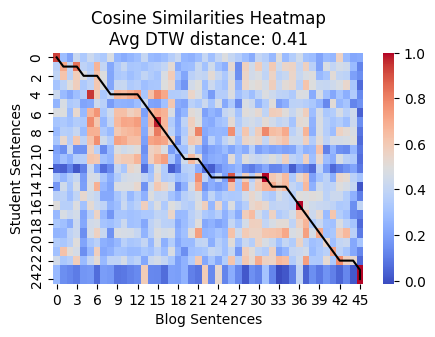

In [9]:
path_ = np.array(path)
avg_cos_dist = distance / path_.shape[0]
print(avg_cos_dist)
# Plot the cosine similarities as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cosine_similarities, annot=False, fmt=".2f", cmap='coolwarm')
plt.plot(path_[:,1]+0.5, path_[:,0]+0.5, color='black')
plt.title(f'Cosine Similarities Heatmap\nAvg DTW distance: {avg_cos_dist:.2f}')
plt.xlabel('Blog Sentences')
plt.ylabel('Student Sentences')
plt.show()

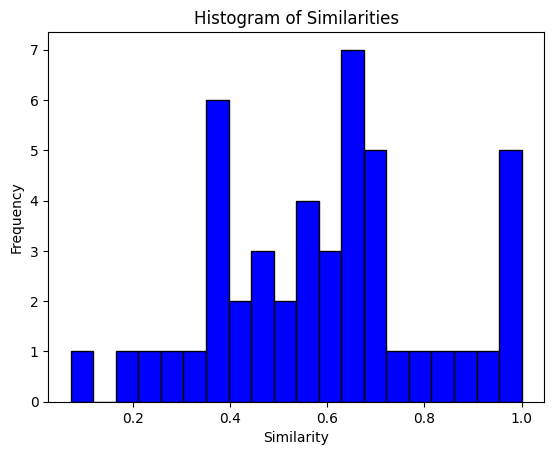

In [10]:
similarities = []
for i in range(path_.shape[0]):
    similarities.append(cosine_similarities[path_[i,0], path_[i,1]])

plt.hist(similarities, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Similarities')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()